# Tarea KNN

Diego Lozoya Morales | 745345

# Paqueterías

In [10]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

# Data

In [11]:
data = pd.read_csv('Data/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Variable dependiente

In [12]:
target = 'cnt'
y = data[target]

# Limpieza de datos

In [13]:
data = data.drop(columns=["casual", "registered", "instant", "dteday", "mnth", "yr"])
data.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


# Preparación de datos

## Train/Test

In [14]:
X = data.copy().drop(target, axis=1)
X = pd.get_dummies(X, columns=["season", "weekday", "weathersit"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaler

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Óptimo KNN

## Aproximación gráfica

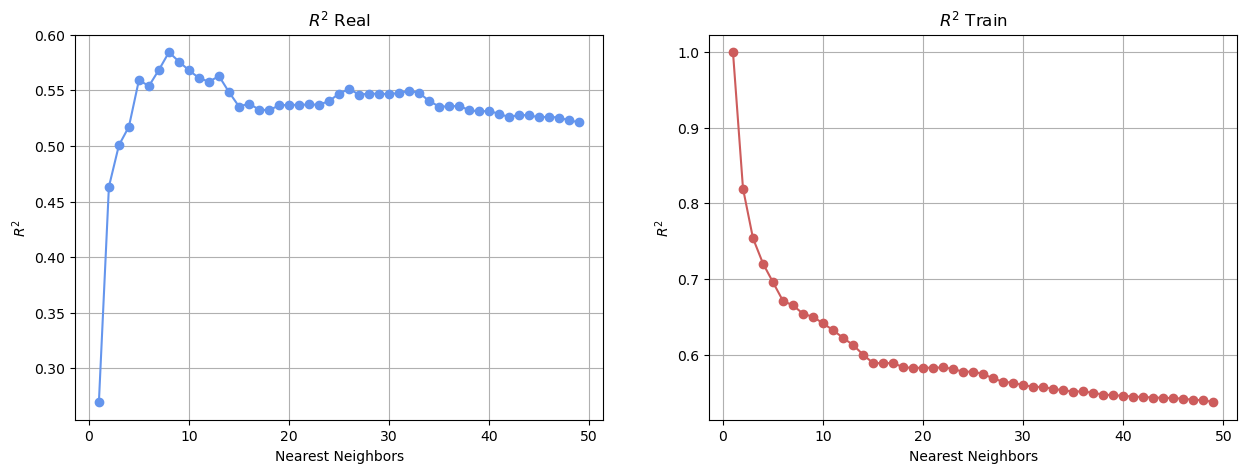

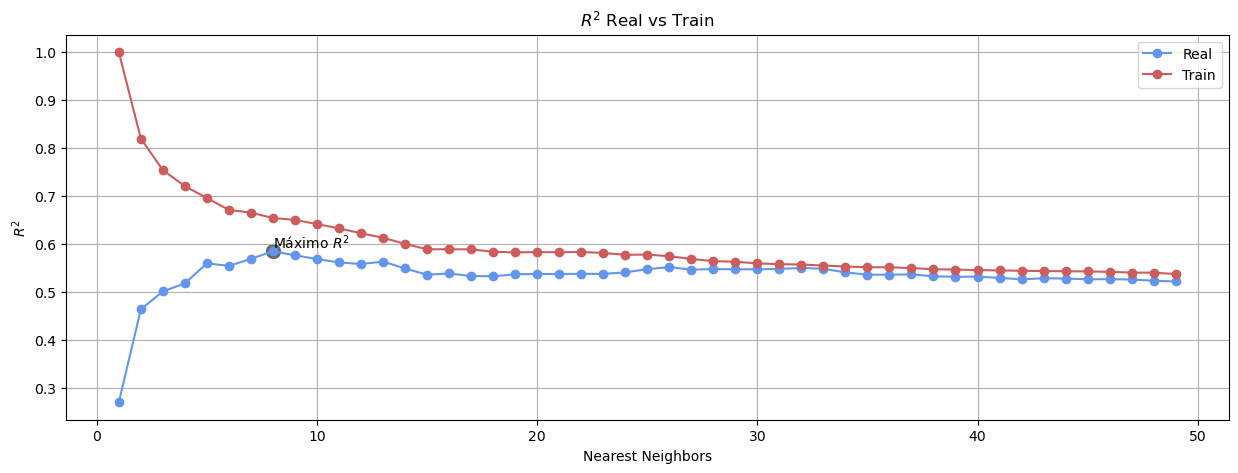

In [35]:
nn = []
r2 = []
r2_train = []
for i in range(1, 50):
    
    model = KNeighborsRegressor(n_neighbors=i).fit(X_train_scaled, y_train)
    predicciones = model.predict(X_test_scaled)

    r2.append(r2_score(y_true=y_test, y_pred=predicciones))
    nn.append(i)

    predicciones_train = model.predict(X_train_scaled)
    r2_train.append(r2_score(y_true=y_train, y_pred=predicciones_train))

resultados = pd.DataFrame({'r2': r2, 'nn': nn, 'r2_train': r2_train})

fig, axes = plt.subplots(1, 2, figsize=(15, 5))  

axes[0].plot(resultados.nn, resultados.r2, label='real', color=colors[0], marker='o')
axes[0].grid()
axes[0].set_title("$R^2$ Real")
axes[0].set_xlabel("Nearest Neighbors")
axes[0].set_ylabel("$R^2$")

axes[1].plot(resultados.nn, resultados.r2_train, label='train', color=colors[1], marker='o')
axes[1].grid()
axes[1].set_title("$R^2$ Train")
axes[1].set_xlabel("Nearest Neighbors")
axes[1].set_ylabel("$R^2$")

plt.show()

plt.figure(figsize=(15, 5))
plt.plot(resultados.nn, resultados.r2, label='Real', color=colors[0], marker='o')
plt.plot(resultados.nn, resultados.r2_train, label='Train', color=colors[1], marker='o')
plt.scatter(8, max(resultados.r2), color=colors[-1], s=100)
plt.text(8, max(resultados.r2), f"Máximo $R^2$", va='bottom')
plt.grid()
plt.legend()
plt.title("$R^2$ Real vs Train")
plt.xlabel("Nearest Neighbors")
plt.ylabel("$R^2$")
plt.show()

En la gráfica se puede ver que el máximo R2 se obtiene al utilizar 8 nearest neighbors

## Prueba y error

In [42]:
model = KNeighborsRegressor(n_neighbors=7).fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)
nn7 = r2_score(y_true=y_test, y_pred=predicciones)

model = KNeighborsRegressor(n_neighbors=8).fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)
nn8 = r2_score(y_true=y_test, y_pred=predicciones)

model = KNeighborsRegressor(n_neighbors=9).fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)
nn9 = r2_score(y_true=y_test, y_pred=predicciones)

print(f"R2 con 7 neighbors: {nn7:.4f} \nR2 con 8 neighbors: {nn8:.4f} \nR2 con 9 neighbors: {nn9:.4f}")

R2 con 7 neighbors: 0.5686 
R2 con 8 neighbors: 0.5844 
R2 con 9 neighbors: 0.5761


# Conclusión

Tras haber hecho la limpieza de datos, escalado los datos y haberlos separado en train y test, se demuestra gráficamente que el número óptimo de neighbors es de 8. Esto se comprueba mediante prueba y error, en donde se puede ver que el óptimo de neighbors es de 8, ya que al pasar de 7 a 8 aumenta el R2, mientras que de 8 a 9 este disminuye. Utilizando 8 neighbors se obtiene un coeficiente de R2 de 0.5844, lo que quiere decir que el 58.44% de la variación de los datos está explicada por el modelo.